### The following exercise is adapted from the AmEx 2019 Hackathon

In [1]:
import pandas as pd

In [2]:
train_data_path = '/home/ngarg/Documents/work/Freelancing/VDS/ref/amex/data/train.csv'
item_data_path = '/home/ngarg/Documents/work/Freelancing/VDS/ref/amex/data/item_data.csv'
customer_transaction_data_path = '/home/ngarg/Documents/work/Freelancing/VDS/ref/amex/data/customer_transaction_data.csv'
customer_demographics_data_path = '/home/ngarg/Documents/work/Freelancing/VDS/ref/amex/data/customer_demographics.csv'
coupon_item_mapping_data_path = '/home/ngarg/Documents/work/Freelancing/VDS/ref/amex/data/coupon_item_mapping.csv'
campaign_data_path = '/home/ngarg/Documents/work/Freelancing/VDS/ref/amex/data/campaign_data.csv'

train_raw_data = pd.read_csv(train_data_path)
item_raw_data = pd.read_csv(item_data_path)
ct_raw_data = pd.read_csv(customer_transaction_data_path)
cd_raw_data = pd.read_csv(customer_demographics_data_path)
cim_raw_data = pd.read_csv(coupon_item_mapping_data_path)
campaign_raw_data = pd.read_csv(campaign_data_path)

#### store datasets in a list of tuples, where each tuple has the dataset name and the dataframe

In [3]:
raw_datasets = [('train', train_raw_data), ('item', item_raw_data), ('cust trans', ct_raw_data), 
                ('cust demog', cd_raw_data), ('coup-item', cim_raw_data), ('campaign', campaign_raw_data)]

### EDA

In [4]:
[print('dataset {:>12} has {:>8} rows and {:>3} columns'.format(dataset_name, 
                                                                dataset.shape[0], 
                                                                dataset.shape[1])
      ) for dataset_name, dataset in raw_datasets]

dataset        train has    78369 rows and   5 columns
dataset         item has    74066 rows and   4 columns
dataset   cust trans has  1324566 rows and   7 columns
dataset   cust demog has      760 rows and   7 columns
dataset    coup-item has    92663 rows and   2 columns
dataset     campaign has       28 rows and   4 columns


[None, None, None, None, None, None]

In [5]:
[print('\n', dataset_name, ':\n', dataset.head(1).to_string()) for dataset_name, dataset in raw_datasets]


 train :
    id  campaign_id  coupon_id  customer_id  redemption_status
0   1           13         27         1053                  0

 item :
    item_id  brand   brand_type category
0        1      1  Established  Grocery

 cust trans :
          date  customer_id  item_id  quantity  selling_price  other_discount  coupon_discount
0  2012-01-02         1501    26830         1          35.26          -10.69              0.0

 cust demog :
    customer_id age_range marital_status  rented family_size no_of_children  income_bracket
0            1       70+        Married       0           2            NaN               4

 coup-item :
    coupon_id  item_id
0        105       37

 campaign :
    campaign_id campaign_type start_date  end_date
0           24             Y   21/10/13  20/12/13


[None, None, None, None, None, None]

#### In the above 2 cells, you see [None, None, None, None, None, None] additionally in the output. The reason is we are using list comprehension and not storing anything in the list, so when it finishes processing the 6 items in the list 'raw_datasets', it returns a list with 6 'None' values. 

#### It's pretty lame to use list comprehension for this purpose. Following is a better way to do it.

In [6]:
i = 1
for dataset_name, dataset in raw_datasets:
    print('Dataset ', i, ' - ', dataset_name, ':\n', dataset.head(1).to_string(), '\n')
    i += 1

Dataset  1  -  train :
    id  campaign_id  coupon_id  customer_id  redemption_status
0   1           13         27         1053                  0 

Dataset  2  -  item :
    item_id  brand   brand_type category
0        1      1  Established  Grocery 

Dataset  3  -  cust trans :
          date  customer_id  item_id  quantity  selling_price  other_discount  coupon_discount
0  2012-01-02         1501    26830         1          35.26          -10.69              0.0 

Dataset  4  -  cust demog :
    customer_id age_range marital_status  rented family_size no_of_children  income_bracket
0            1       70+        Married       0           2            NaN               4 

Dataset  5  -  coup-item :
    coupon_id  item_id
0        105       37 

Dataset  6  -  campaign :
    campaign_id campaign_type start_date  end_date
0           24             Y   21/10/13  20/12/13 



### Multiple histograms using Pandas hist() method

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f72c2bd6250>,
      dtype=object)

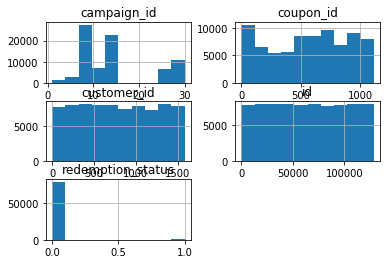

In [7]:
%matplotlib inline
train_raw_data.hist()

### Multiple histograms using Matplotlib

In [8]:
import matplotlib.pyplot as plt

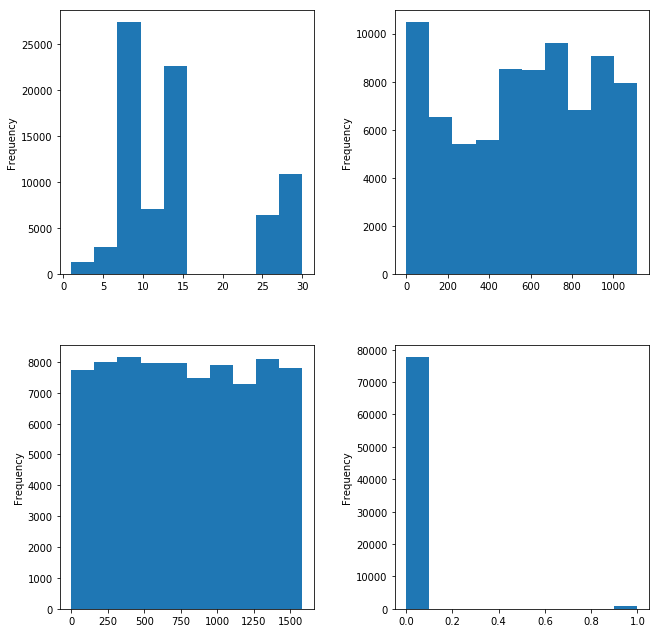

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
fig.tight_layout(pad=5.0)
train_raw_data.campaign_id.plot(kind='hist', ax=axes[0, 0])
train_raw_data.coupon_id.plot(kind='hist', ax=axes[0, 1])
train_raw_data.customer_id.plot(kind='hist', ax=axes[1, 0])
train_raw_data.redemption_status.plot(kind='hist', ax=axes[1, 1])

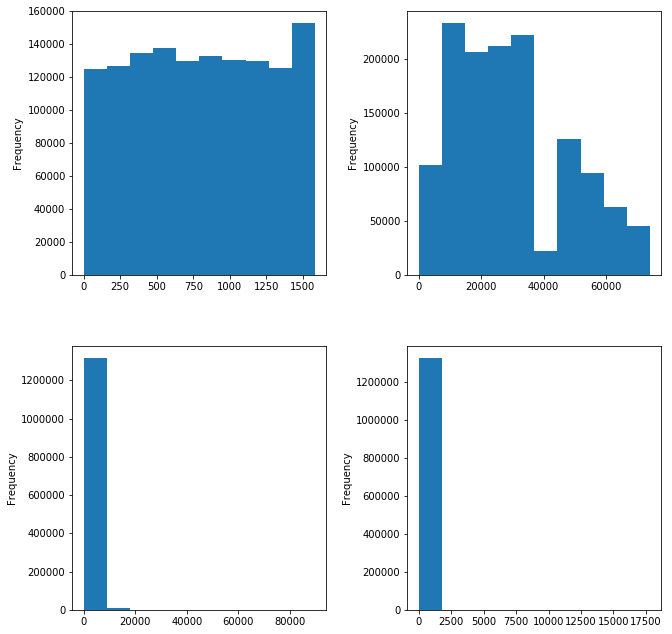

In [10]:
fig2, axes2 = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
fig2.tight_layout(pad=5.0)
ct_raw_data.customer_id.plot(kind='hist', ax=axes2[0, 0])
ct_raw_data.item_id.plot(kind='hist', ax=axes2[0, 1])
ct_raw_data.quantity.plot(kind='hist', ax=axes2[1, 0])
ct_raw_data.selling_price.plot(kind='hist', ax=axes2[1, 1])

### Heatmap for correlations in a slice of ct_raw_data

In [11]:
heatmap_data = ct_raw_data[['customer_id', 'item_id', 'quantity', 'selling_price']].corr()
heatmap_data

,customer_id,item_id,quantity,selling_price
customer_id,1.000000,0.002864,0.000016,0.004312
item_id,0.002864,1.000000,0.105149,0.126384
quantity,0.000016,0.105149,1.000000,0.672741
selling_price,0.004312,0.126384,0.672741,1.000000


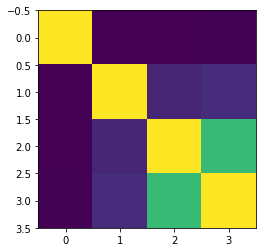

In [12]:
plt.imshow(heatmap_data)
plt.show()

#### improving the above heatmap

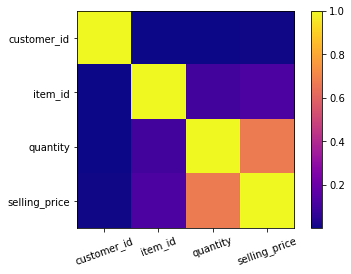

In [13]:
plt.imshow(heatmap_data, cmap='plasma')
plt.colorbar()
plt.xticks(range(len(heatmap_data)),heatmap_data.columns, rotation=20)
plt.yticks(range(len(heatmap_data)),heatmap_data.index)
plt.show()